##Objective
The objective of this project is to build and evaluate a classification model that can predict whether a patient has diabetes based on the provided diagnostic measurements. By achieving this, we aim to support healthcare providers in the early identification and management of diabetes, potentially improving patient outcomes and reducing healthcare costs.

##Data Source
This dataset has been generously provided by the National Institute of Diabetes and Digestive and Kidney Diseases. It has been curated to include only female patients of at least 21 years of age and of Pima Indian heritage, ensuring a focused study on this specific population.



#Dataset Description
The dataset includes the following features:

Pregnancies: Number of times the patient has been pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: A function that scores likelihood of diabetes based on family history

Age: Age of the patient (years)

Outcome: Class variable indicating whether the patient has diabetes (1) or not (0)


# Load data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes (3).csv


In [ ]:
import pandas as pd


df = pd.read_csv('diabetes.csv')

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.shape

(768, 9)

# Exploratory data analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

So, there are no missing values and all of our features are numerical

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

So the outcomes are imbalanced

<Axes: xlabel='Outcome'>

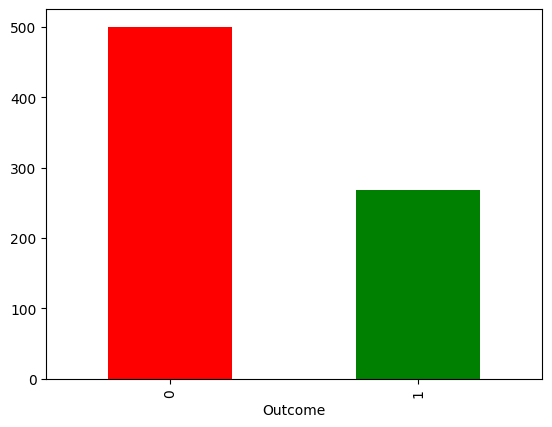

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', color = ["red", "green"])

###Pregnancies               

In [ ]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<ipython-input-13-295da6461724>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pregnancies', y='Counts', data=df_pregnancies, palette='viridis')


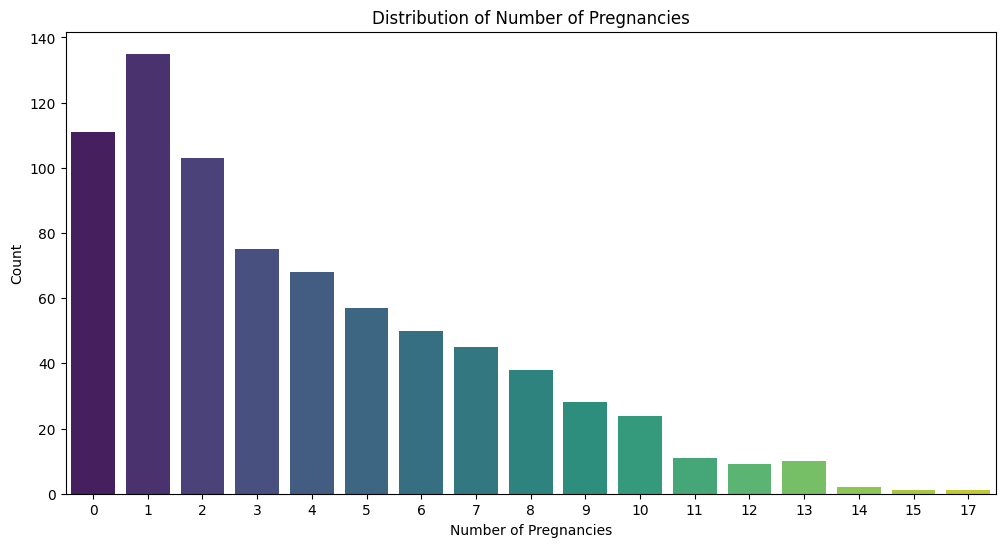

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the number of pregnancies
pregnancies_data = {
    'Pregnancies': [1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14, 15, 17],
    'Counts': [135, 111, 103, 75, 68, 57, 50, 45, 38, 28, 24, 11, 10, 9, 2, 1, 1]
}

# Create a DataFrame
df_pregnancies = pd.DataFrame(pregnancies_data)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Pregnancies', y='Counts', data=df_pregnancies, palette='viridis')

# Add labels and title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Distribution of Number of Pregnancies')

# Show the plot
plt.show()


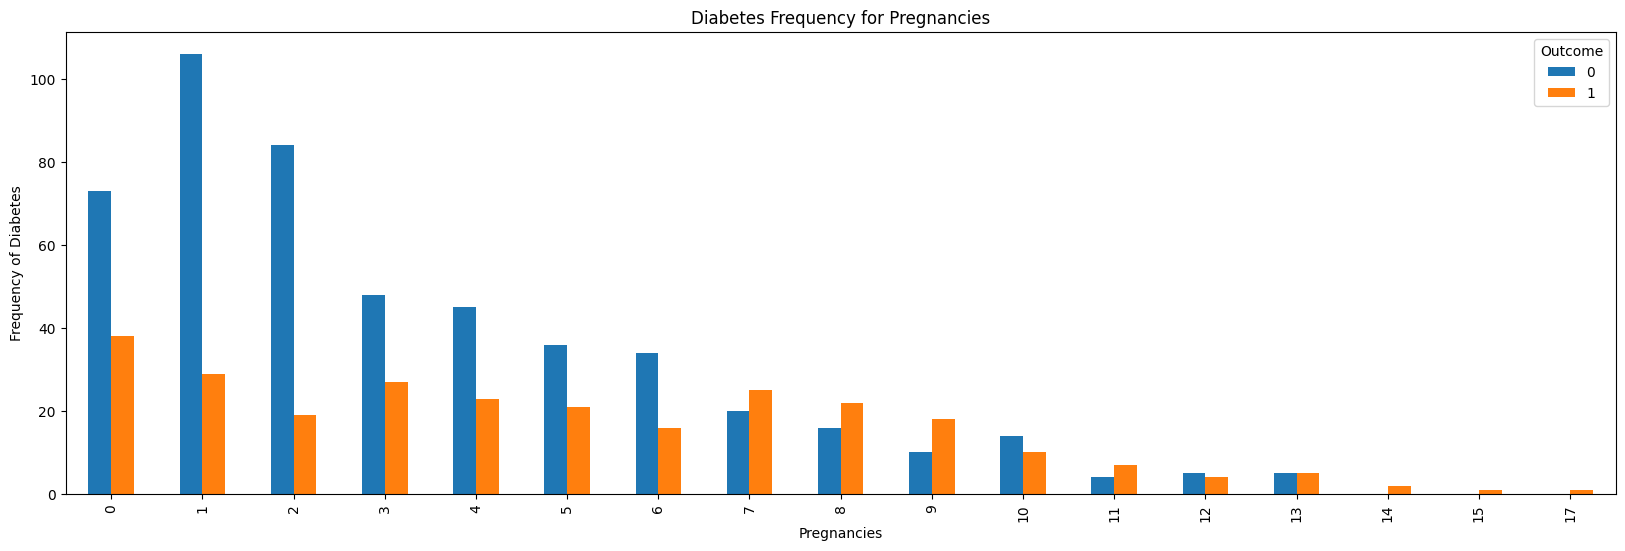

In [ ]:
#Lets compare the pregnancies to the outcomes
pd.crosstab(df.Pregnancies,df.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency of Diabetes')
plt.show()

###BloodPressure

In [ ]:
df.BloodPressure.value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

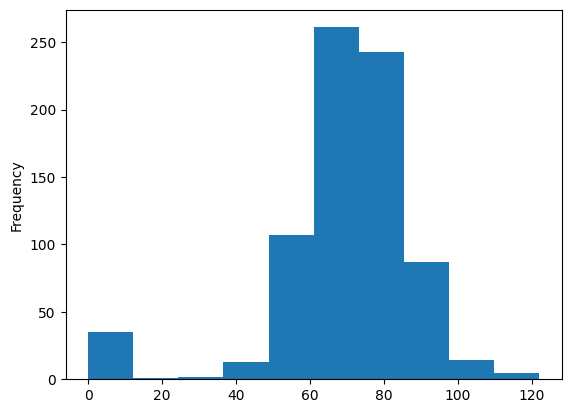

In [ ]:
#frequency vs bloodpressure
df.BloodPressure.plot.hist();

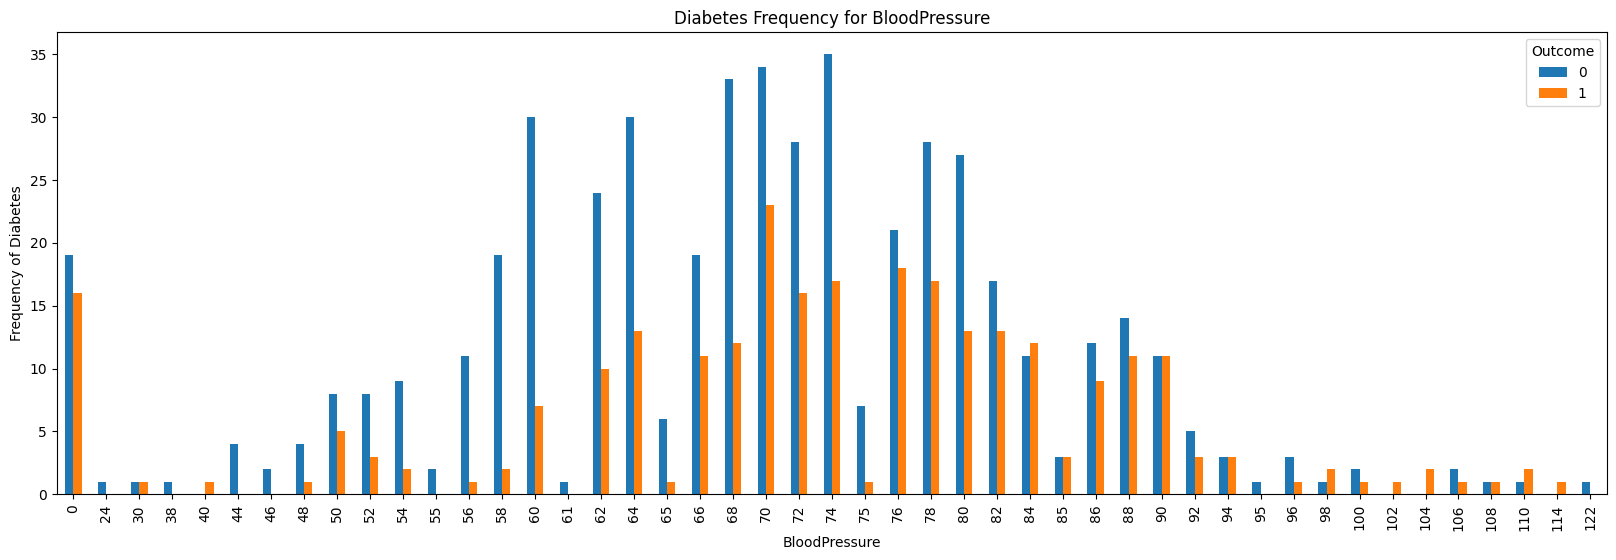

In [ ]:
#BloodPressure vs outcomes
pd.crosstab(df.BloodPressure,df.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency of Diabetes')
plt.show()

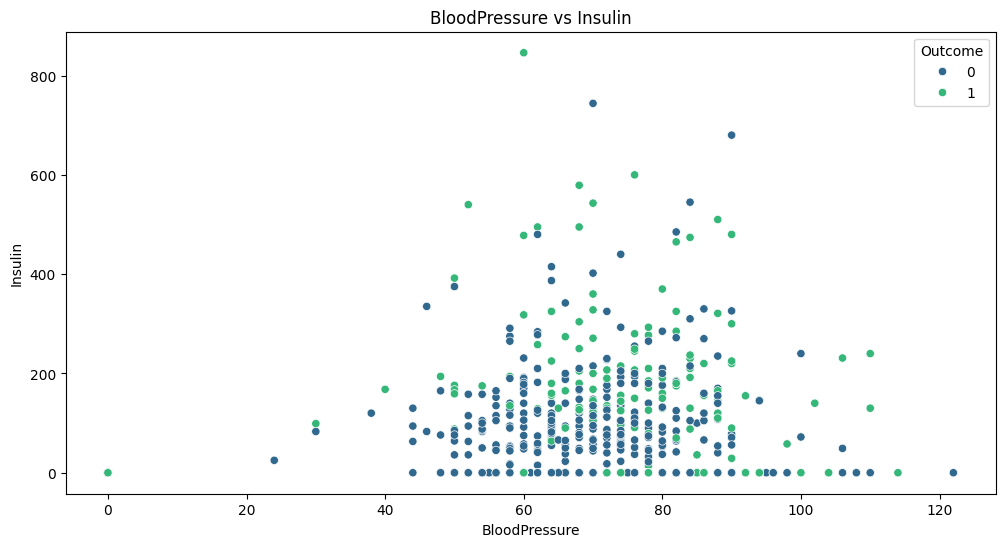

In [ ]:
#blood pressure vs insulin
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BloodPressure', y='Insulin', data=df, hue='Outcome', palette='viridis')

# Add labels and title
plt.xlabel('BloodPressure')
plt.ylabel('Insulin')
plt.title('BloodPressure vs Insulin')

# Show the plot
plt.show()


###SkinThickness  

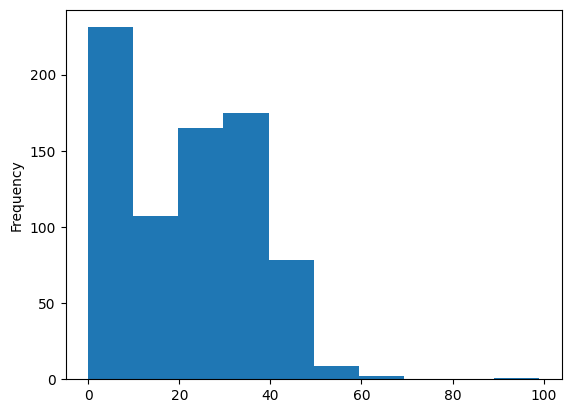

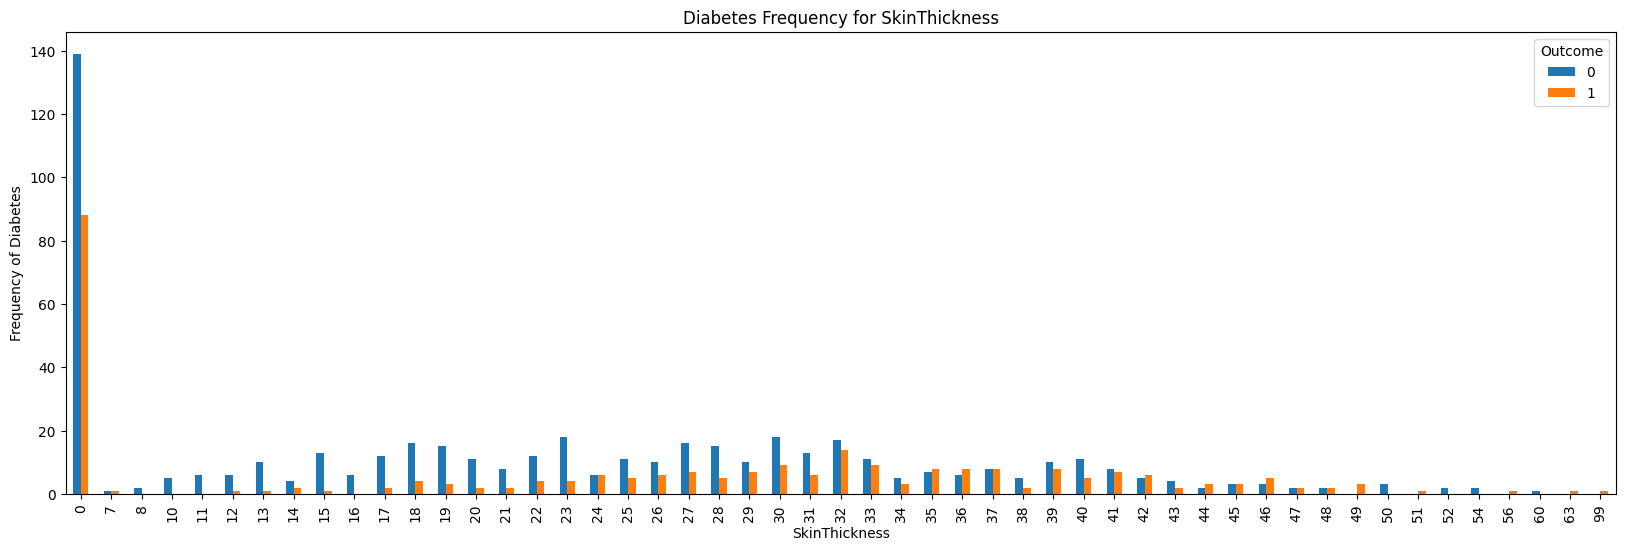

In [ ]:

df.SkinThickness.value_counts()

#frequency vs SkinThickness
df.SkinThickness.plot.hist();

#SkinThickness vs outcomes
pd.crosstab(df.SkinThickness,df.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency of Diabetes')
plt.show()


# Show the plot
plt.show()


###Glucose

In [ ]:
df.Glucose.value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

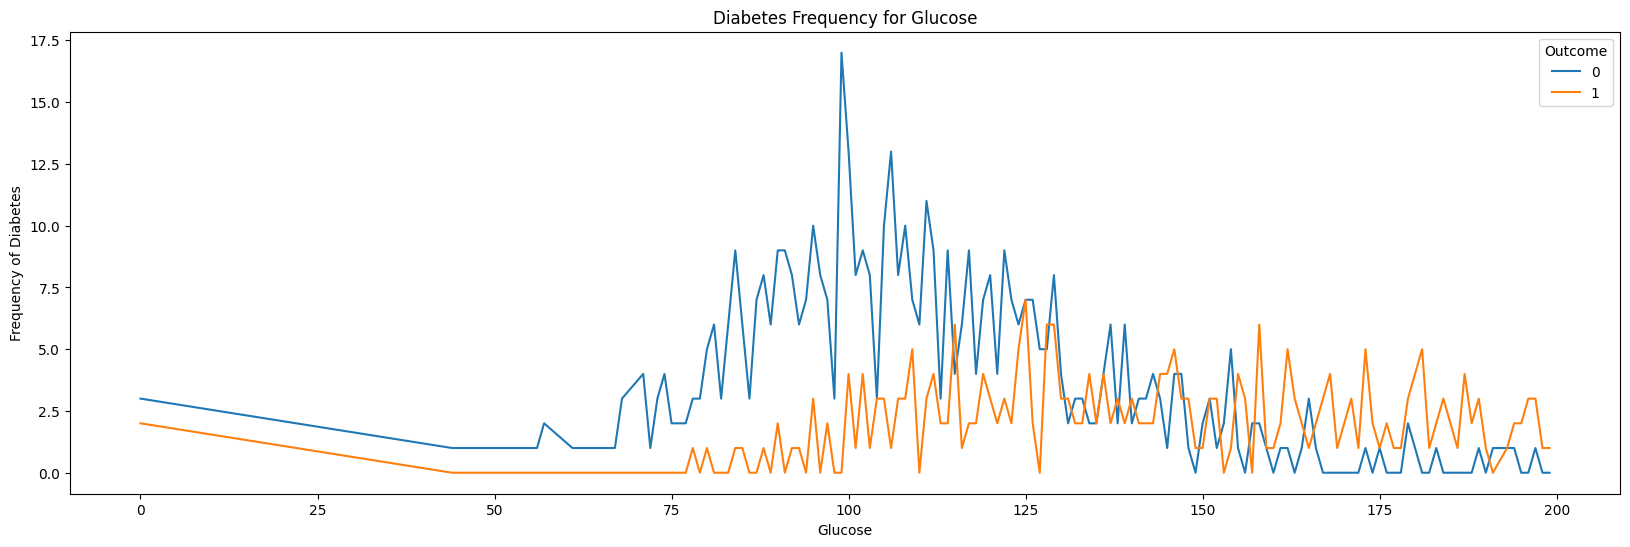

In [ ]:
pd.crosstab(df.Glucose,df.Outcome).plot(kind="line",figsize=(20,6))
plt.title('Diabetes Frequency for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency of Diabetes')
plt.show()


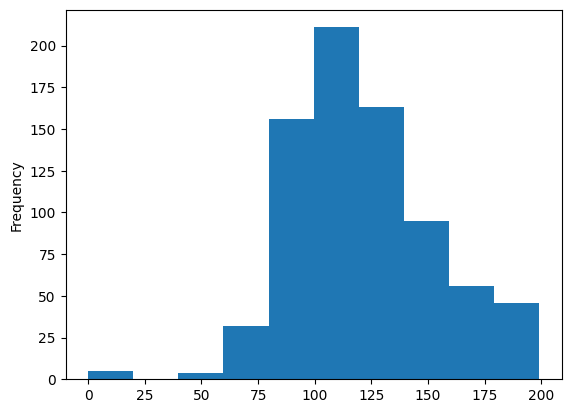

In [ ]:
df.Glucose.plot.hist();

###Insulin

In [ ]:

import pandas as pd

# Load data
df = pd.read_csv('diabetes.csv')

# Calculate statistics for insulin
insulin_stats = df['Insulin'].describe()

# Print the mean and median
print("Mean:", insulin_stats['mean'])
print("Median:", insulin_stats['50%'])

# Print all statistics
print(insulin_stats)


Mean: 79.79947916666667
Median: 30.5
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


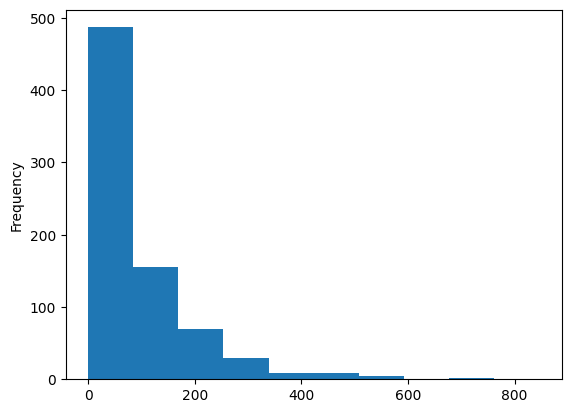

In [ ]:
#insulin vs count
df.Insulin.plot.hist();

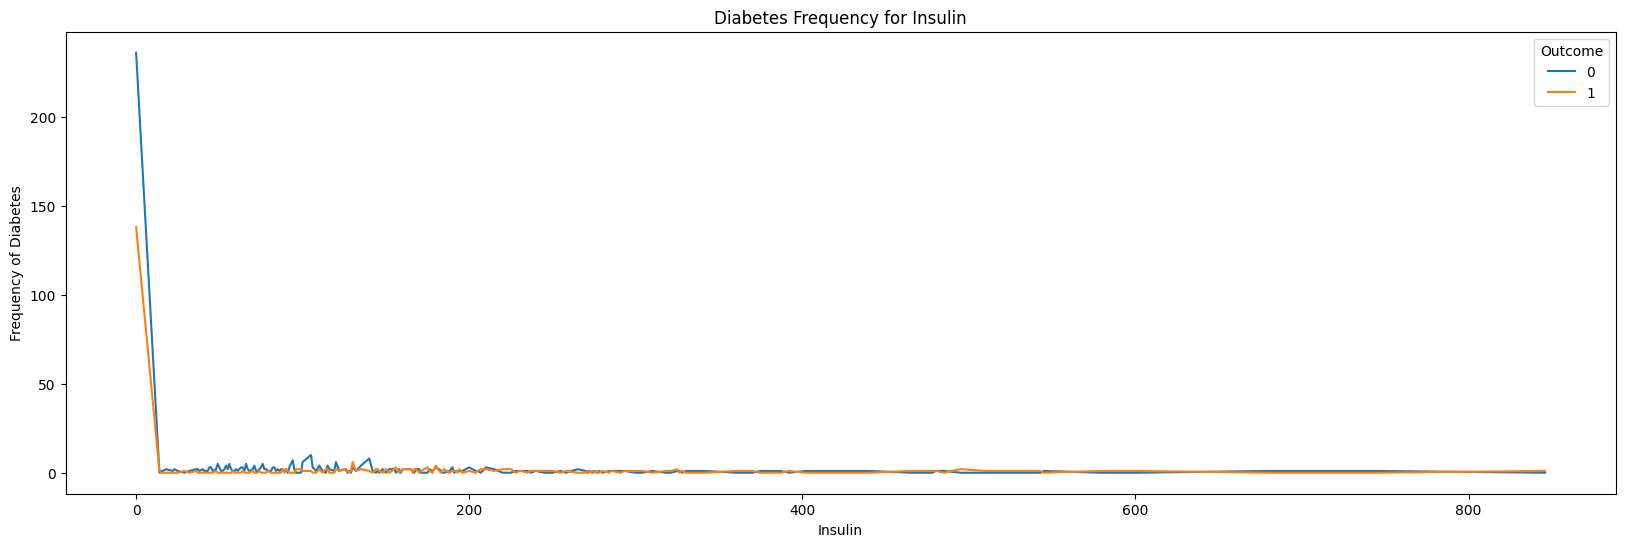

In [ ]:
#insulin vs outcome curve
pd.crosstab(df.Insulin,df.Outcome).plot(kind="line",figsize=(20,6))
plt.title('Diabetes Frequency for Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency of Diabetes')
plt.show()

###BMI

Mean: 31.992578124999998
Median: 32.0
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


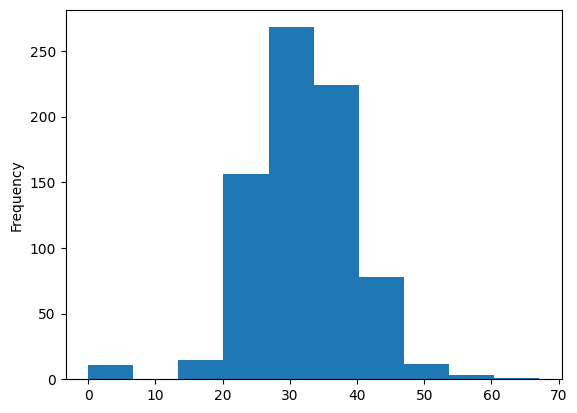

In [ ]:
# Calculate statistics for BMI
bmi_stats = df['BMI'].describe()

# Print the mean and median
print("Mean:", bmi_stats['mean'])
print("Median:", bmi_stats['50%'])

# Print all statistics
print(bmi_stats)

# Plot the distribution of BMI
df['BMI'].plot.hist()
plt.show()



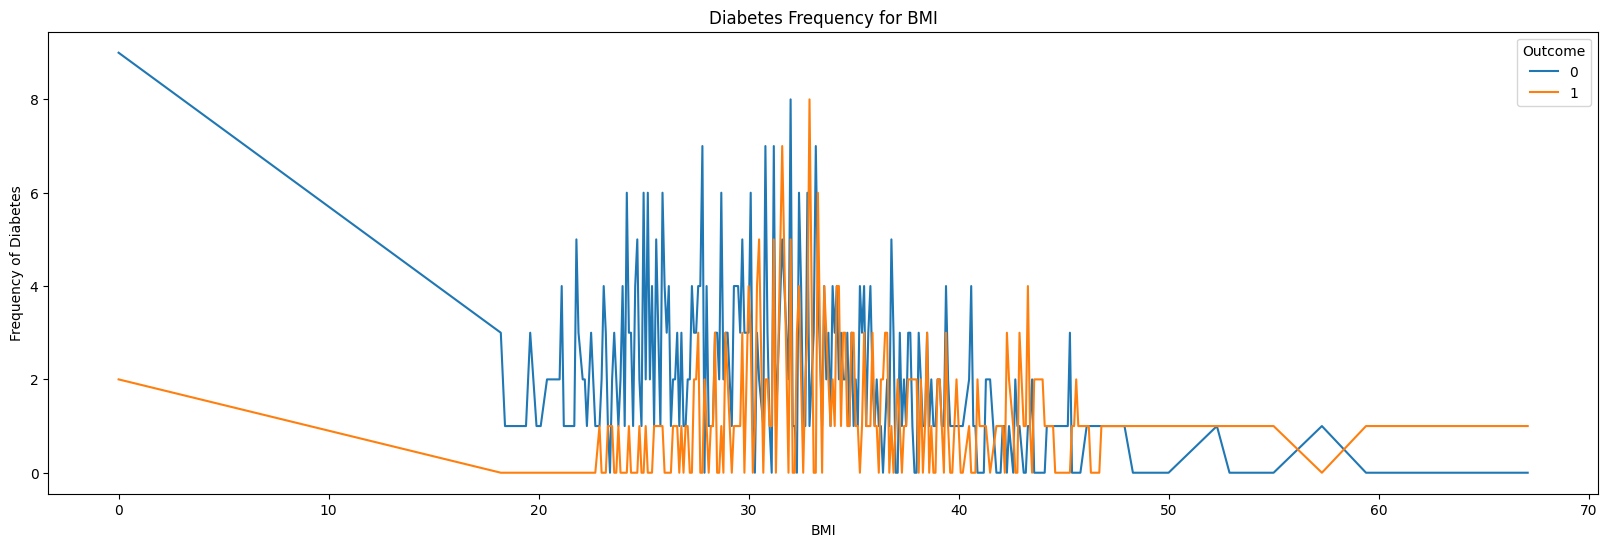

In [ ]:
#BMI vs  outcomes
pd.crosstab(df.BMI,df.Outcome).plot(kind="line",figsize=(20,6))
plt.title('Diabetes Frequency for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency of Diabetes')
plt.show()

###DiabetesPedigreeFunction

Mean: 0.47187630208333325
Median: 0.3725
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64


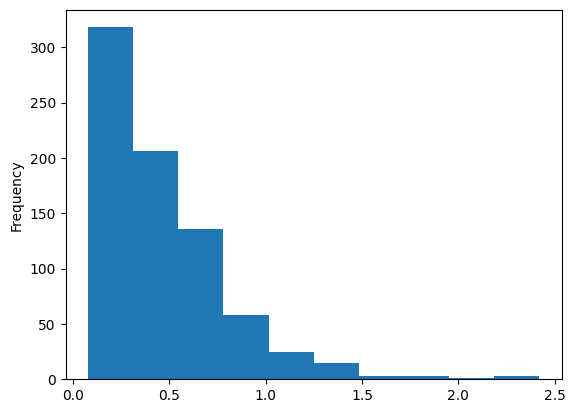

In [ ]:
# Calculate statistics for DiabetesPedigreeFunction
diabetes_pedigree_function_stats = df['DiabetesPedigreeFunction'].describe()

# Print the mean and median
print("Mean:", diabetes_pedigree_function_stats['mean'])
print("Median:", diabetes_pedigree_function_stats['50%'])

# Print all statistics
print(diabetes_pedigree_function_stats)

# Plot the distribution of DiabetesPedigreeFunction
df['DiabetesPedigreeFunction'].plot.hist()
plt.show()


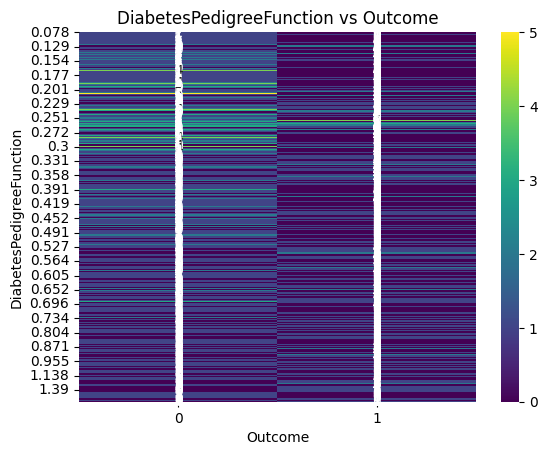

In [ ]:
#DiabetesPedigreeFunction vs outcomes heat map

import seaborn as sns

# Create a heatmap of DiabetesPedigreeFunction vs Outcome
sns.heatmap(pd.crosstab(df['DiabetesPedigreeFunction'], df['Outcome']), annot=True, cmap='viridis')

# Add labels and title
plt.xlabel('Outcome')
plt.ylabel('DiabetesPedigreeFunction')
plt.title('DiabetesPedigreeFunction vs Outcome')

# Show the plot
plt.show()


###Age

In [ ]:
df.Age.value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

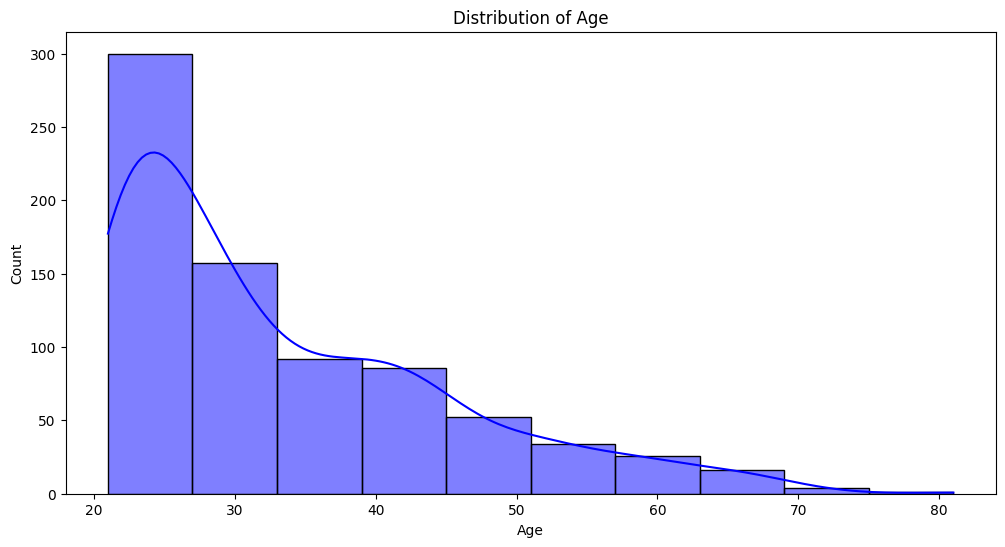

In [ ]:

#  curve

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='blue')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Show the plot
plt.show()


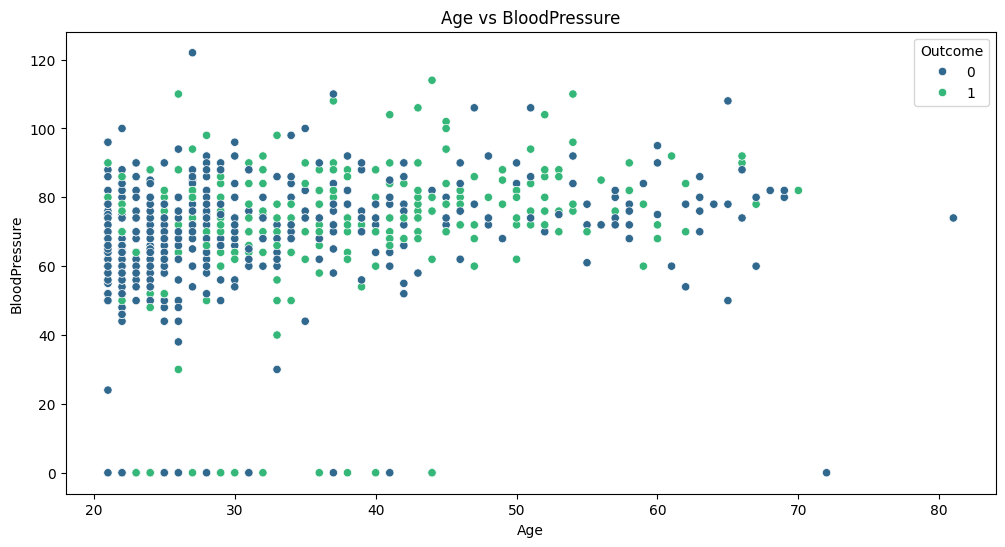

In [ ]:
#Age vs BloodPressure

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='BloodPressure', data=df, hue='Outcome', palette='viridis')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Age vs BloodPressure')

# Show the plot
plt.show()

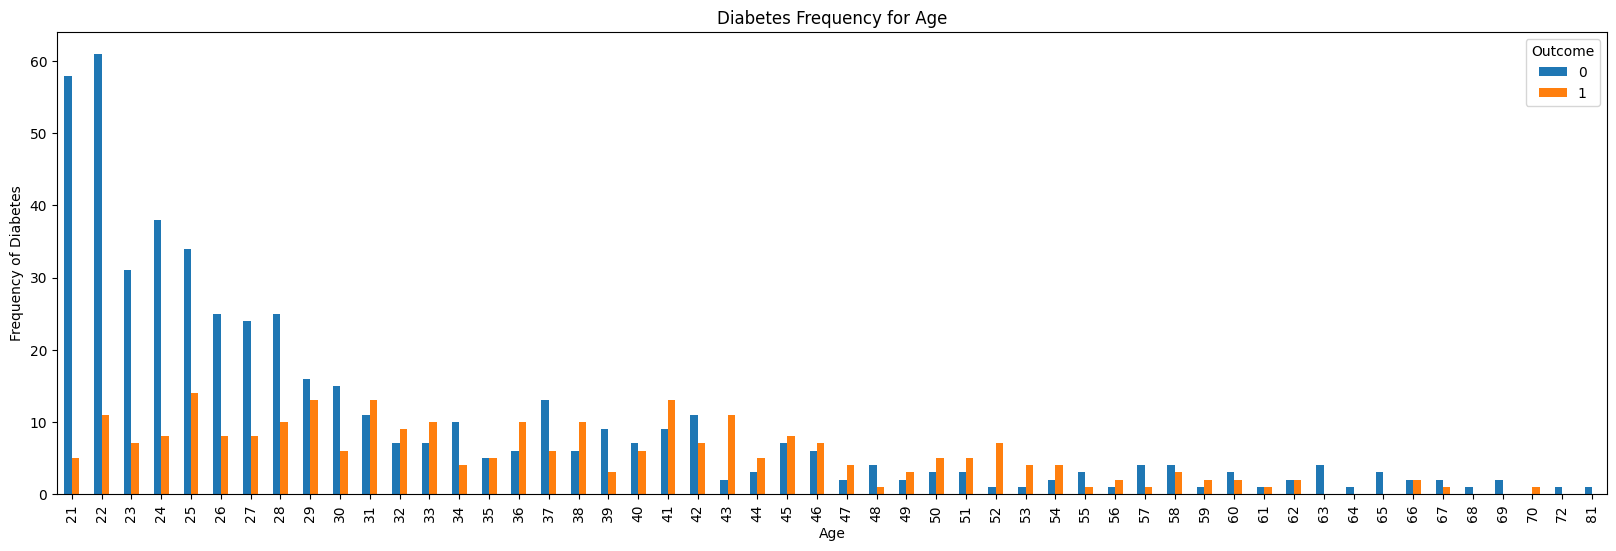

In [ ]:
#age vs outcome

pd.crosstab(df.Age,df.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Diabetes')
plt.show()

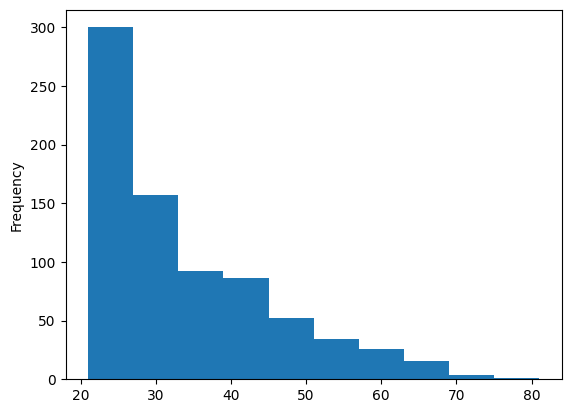

In [ ]:
df.Age.plot.hist();

###General analysis

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

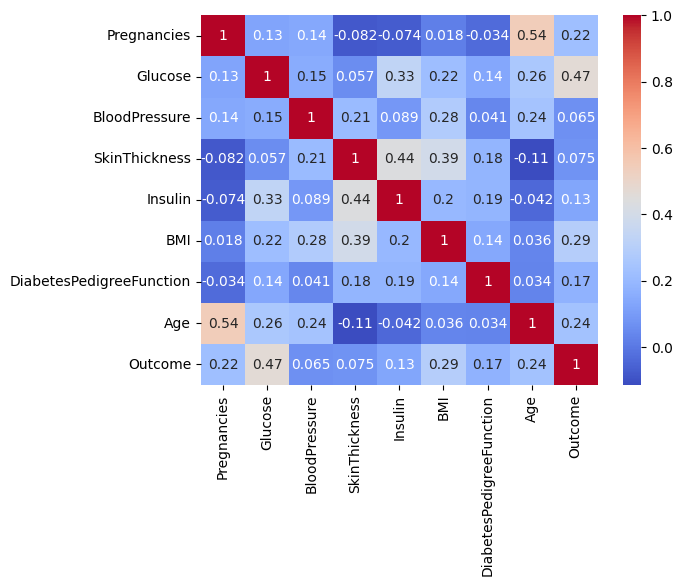

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

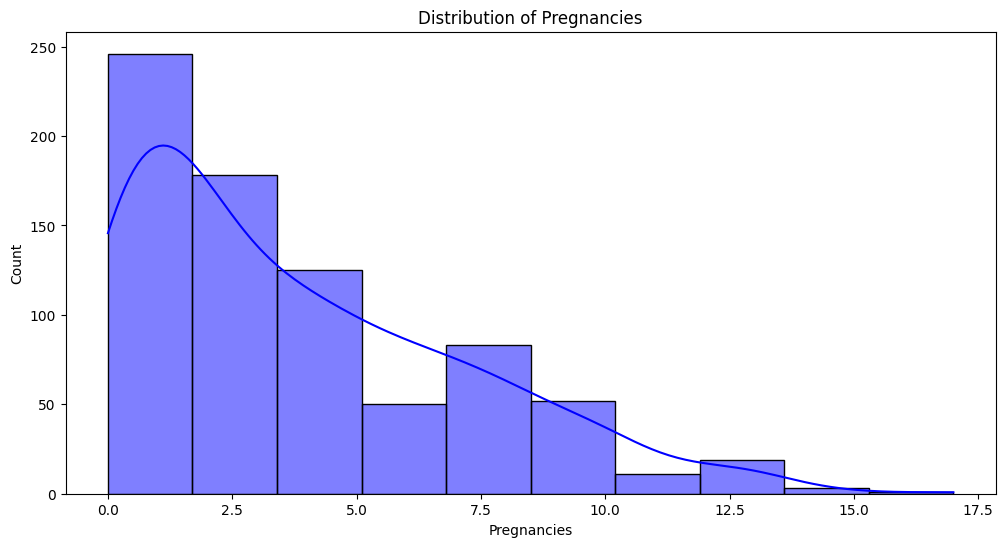

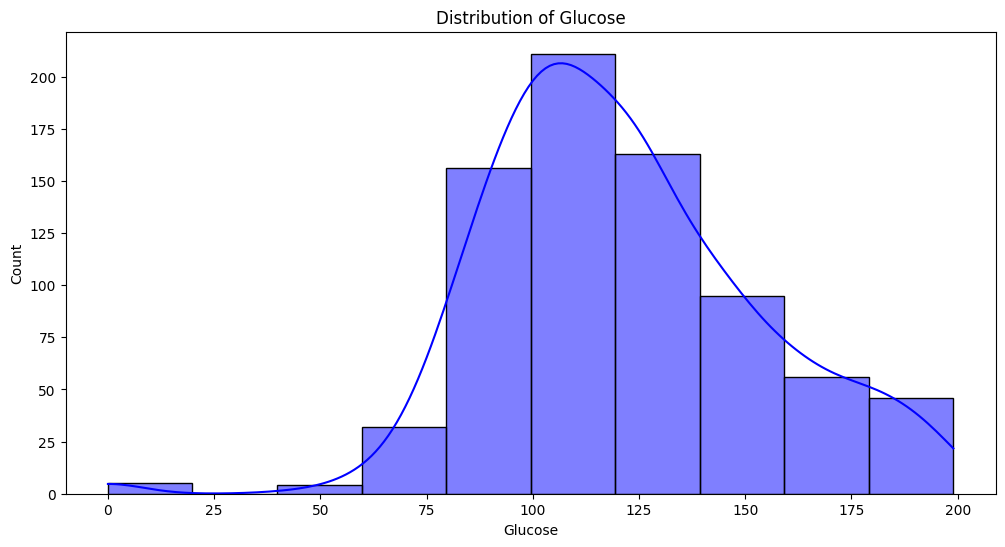

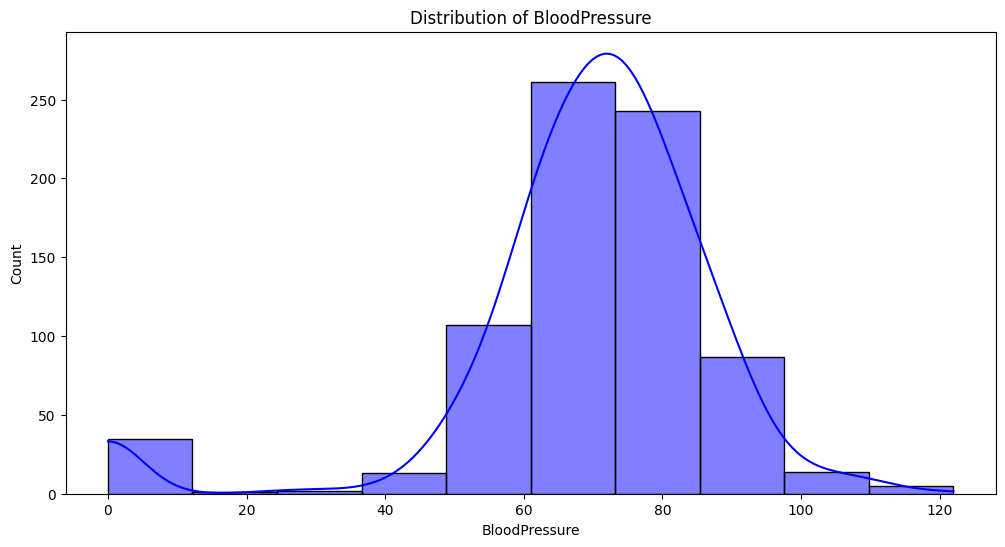

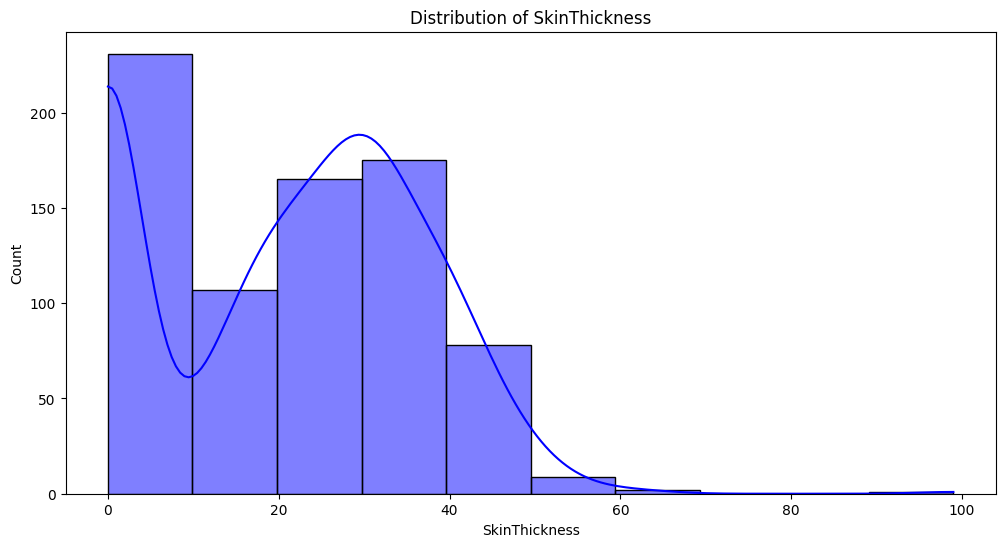

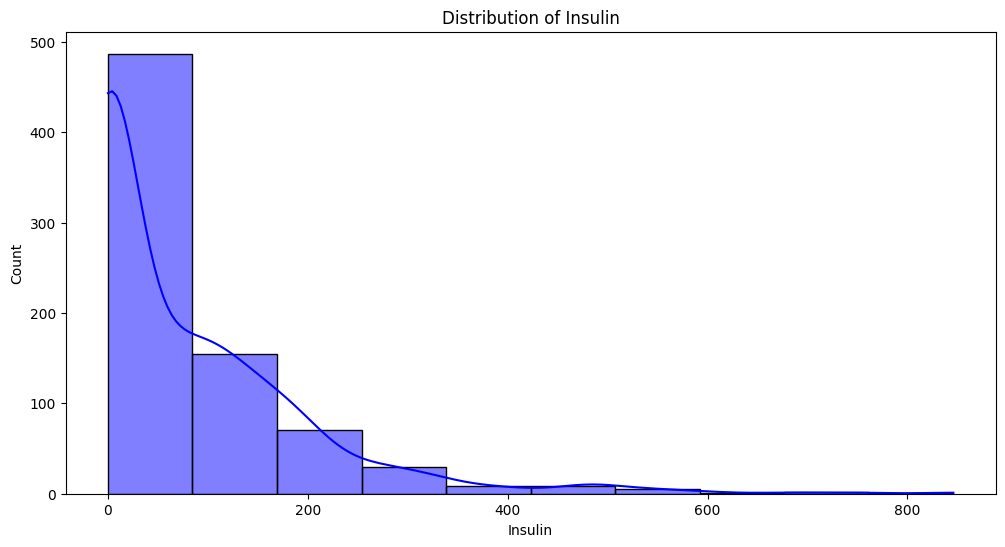

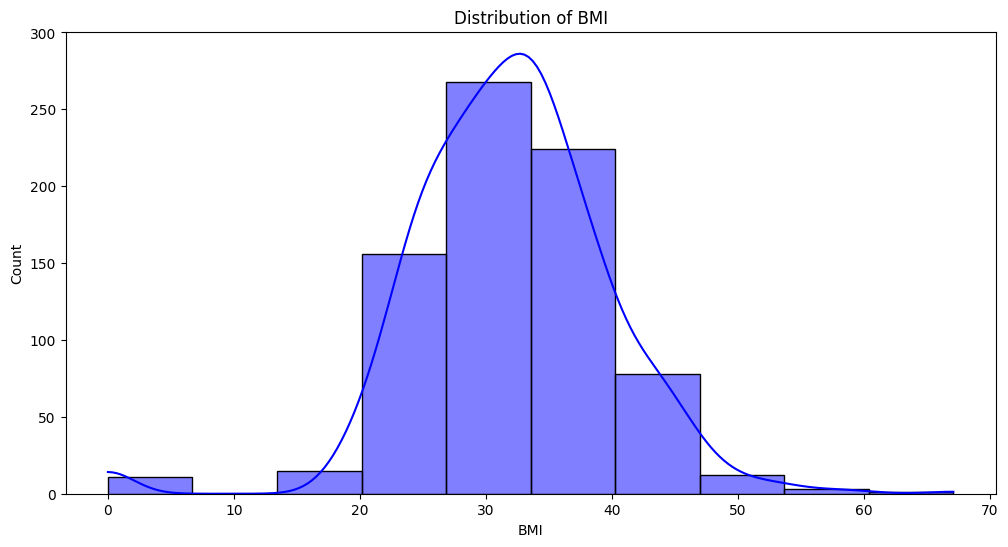

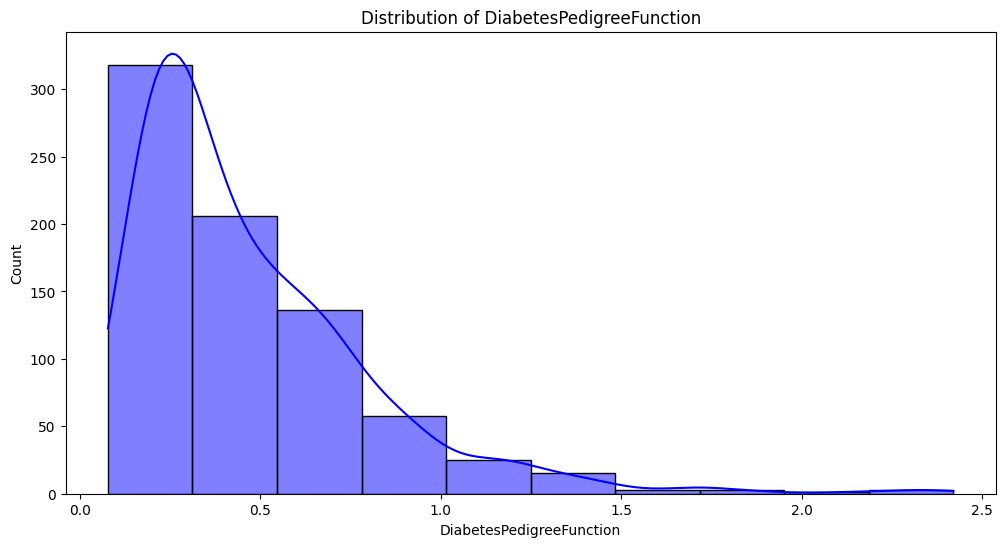

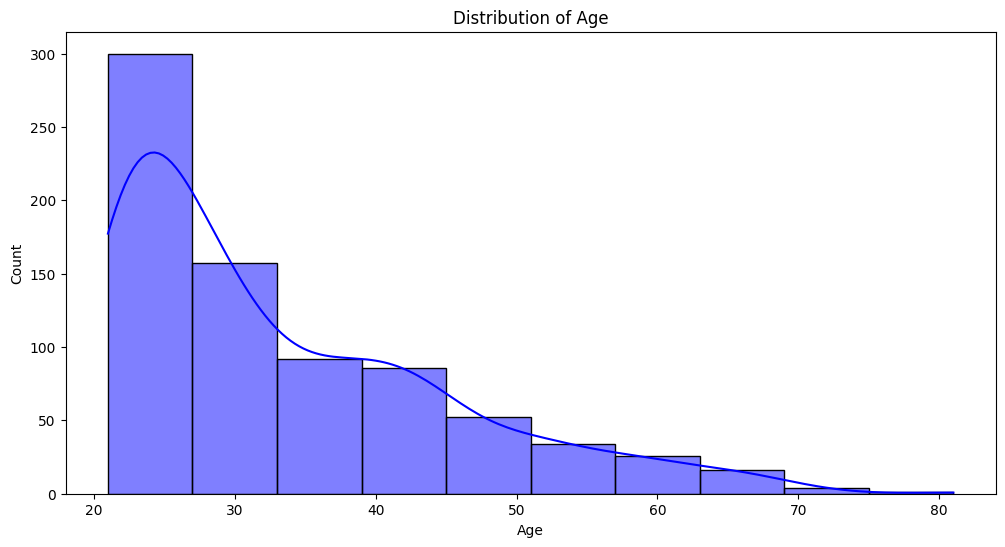

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in features:
  plt.figure(figsize=(12, 6))
  sns.histplot(df[feature], bins=10, kde=True, color='blue')

  # Add labels and title
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title('Distribution of ' + feature)

  # Show the plot
  plt.show()


# Modeling

In [ ]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay # Use RocCurveDisplay instead of plot_roc_curve

In [ ]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(614, 154, 614, 154)

In [ ]:

from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

linear_svc = LinearSVC()
svc = SVC()
random_forest_classifier = RandomForestClassifier()
k_nearest_neighbors = KNeighborsClassifier()
logistic_regression = LogisticRegression()


In [ ]:

models = [linear_svc, svc, random_forest_classifier, k_nearest_neighbors, logistic_regression]

for model in models:
  model.fit(X_train, y_train)
  print(f"{model.__class__.__name__}: {model.score(X_test, y_test)}")

print("Comparison of model scores:")
for model in models:
  print(f"{model.__class__.__name__}: {model.score(X_test, y_test)}")



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC: 0.6038961038961039
SVC: 0.7662337662337663
RandomForestClassifier: 0.7532467532467533
KNeighborsClassifier: 0.6623376623376623
LogisticRegression: 0.7467532467532467
Comparison of model scores:
LinearSVC: 0.6038961038961039
SVC: 0.7662337662337663
RandomForestClassifier: 0.7532467532467533
KNeighborsClassifier: 0.6623376623376623
LogisticRegression: 0.7467532467532467


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create a DataFrame to store model scores
model_scores = pd.DataFrame({
    'Model': [model.__class__.__name__ for model in models],
    'Score': [model.score(X_test, y_test) for model in models]
})

# Sort the DataFrame by score in descending order
model_scores.sort_values(by='Score', ascending=False)


,Model,Score
1,SVC,0.766234
2,RandomForestClassifier,0.753247
4,LogisticRegression,0.746753
3,KNeighborsClassifier,0.662338
0,LinearSVC,0.603896


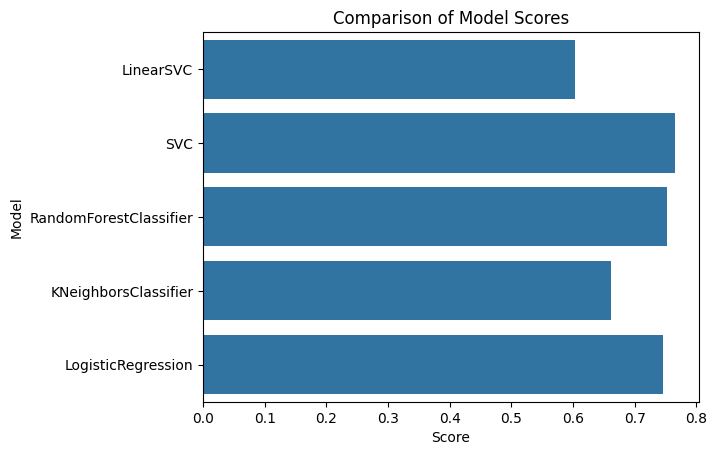

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of model scores
sns.barplot(x='Score', y='Model', data=model_scores)

# Add a title and labels
plt.title('Comparison of Model Scores')
plt.xlabel('Score')
plt.ylabel('Model')

# Show the plot
plt.show()


# Hyperparameter tuning

eventhough svc performed the best its taking alot of time so we will tune the randomforestclassifer and logistic regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the hyperparameter space for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define the hyperparameter space for LogisticRegression
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}

# Initialize the RandomizedSearchCV objects
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    n_iter=10,            # Reduced number of iterations
    scoring='accuracy',
    cv=3,                 # Reduced number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1             # Use all available CPU cores
)

lr_random_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=lr_param_grid,
    n_iter=10,            # Reduced number of iterations
    scoring='accuracy',
    cv=3,                 # Reduced number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1             # Use all available CPU cores
)

# Fit the models
rf_random_search.fit(X_train, y_train)
lr_random_search.fit(X_train, y_train)

# Get the best parameters and best models
rf_best_params = rf_random_search.best_params_
lr_best_params = lr_random_search.best_params_

print(f"Best parameters for RandomForestClassifier: {rf_best_params}")
print(f"Best parameters for LogisticRegression: {lr_best_params}")

rf_best_model = rf_random_search.best_estimator_
lr_best_model = lr_random_search.best_estimator_

# Evaluate the best models on the test set
rf_test_score = rf_best_model.score(X_test, y_test)
lr_test_score = lr_best_model.score(X_test, y_test)

print(f"Test score for RandomForestClassifier: {rf_test_score}")
print(f"Test score for LogisticRegression: {lr_test_score}")

# Select the best model based on the test score
if rf_test_score > lr_test_score:
    best_model = rf_best_model
    best_score = rf_test_score
    best_model_name = "RandomForestClassifier"
else:
    best_model = lr_best_model
    best_score = lr_test_score
    best_model_name = "LogisticRegression"

print(f"Best model: {best_model_name} with test score: {best_score}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 100}
Test score for RandomForestClassifier: 0.7402597402597403
Test score for LogisticRegression: 0.7532467532467533
Best model: LogisticRegression with test score: 0.7532467532467533


svc without tuning performed the best

# Evaluate model

In [ ]:
y_preds= svc.predict(X_test)

In [ ]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

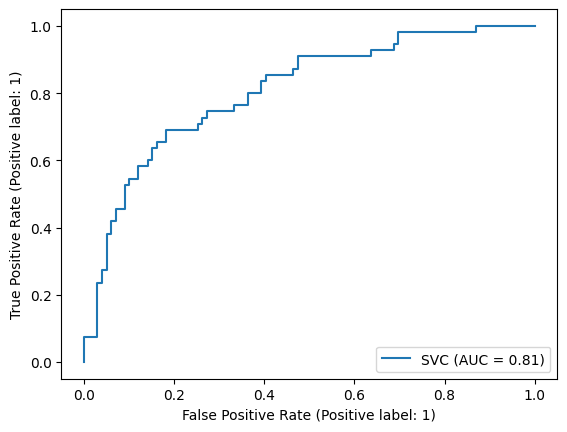

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming 'svc' is your fitted model, 'X_test' is your test data, and 'y_test' are the true labels
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()


In [ ]:
print(confusion_matrix(y_test, y_preds))

[[87 12]
 [24 31]]


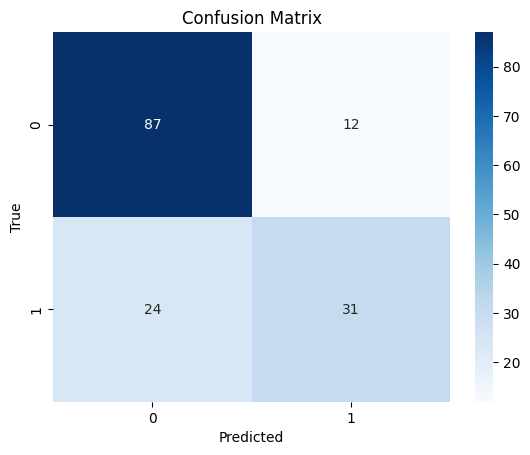

In [ ]:

# Get the confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
lr_best_params

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 100}

In [ ]:
clf = LogisticRegression(solver='liblinear', penalty='l2', max_iter=100, C=100)


In [ ]:
cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
cv_precision = cross_val_score(clf, X, y, scoring='precision')
cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_f1 = cross_val_score(clf, X, y, scoring='f1')

In [ ]:
print(f"Cross-validation accuracy: {cv_acc}")
print(f"Cross-validation precision: {cv_precision}")
print(f"Cross-validation recall: {cv_recall}")
print(f"Cross-validation f1: {cv_f1}")


Cross-validation accuracy: [0.77272727 0.74675325 0.75324675 0.81699346 0.77124183]
Cross-validation precision: [0.71111111 0.64705882 0.71052632 0.79069767 0.73684211]
Cross-validation recall: [0.59259259 0.61111111 0.5        0.64150943 0.52830189]
Cross-validation f1: [0.64646465 0.62857143 0.58695652 0.70833333 0.61538462]


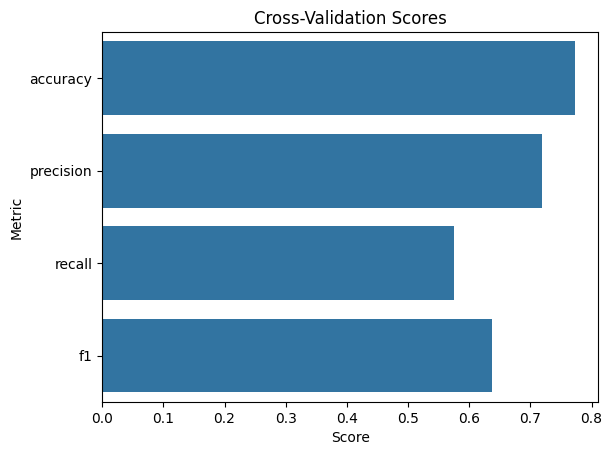

In [ ]:
# Create a list of metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Create a DataFrame to store the results
cv_results = pd.DataFrame({
    'Metric': metrics,
    'Score': [np.mean(cv_acc), np.mean(cv_precision), np.mean(cv_recall), np.mean(cv_f1)]
})

# Sort the DataFrame by score in descending order
cv_results.sort_values(by='Score', ascending=False)

# Plot the results as a bar chart
sns.barplot(x='Score', y='Metric', data=cv_results)

# Add a title and labels
plt.title('Cross-Validation Scores')
plt.xlabel('Score')
plt.ylabel('Metric')

# Show the plot
plt.show()


# Feature Importance

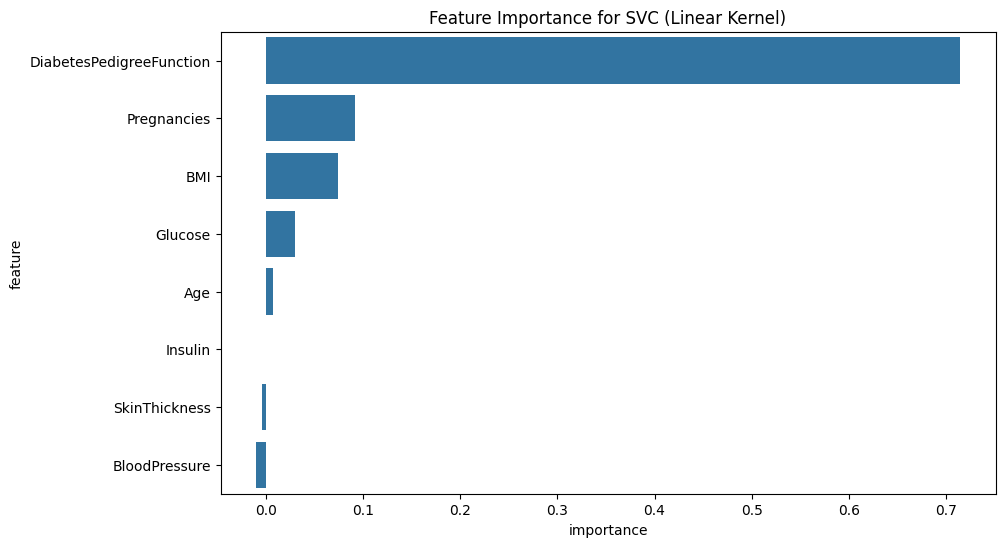

In [ ]:
# Instantiate SVC with a linear kernel
svc = SVC(kernel='linear')

# Fit the model to your data (assuming X and y are defined)
svc.fit(X, y)

# Now you can access the coefficients
importances = svc.coef_[0]
features = X.columns

importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance for SVC (Linear Kernel)')
plt.show()